In [1]:
import json

from matplotlib import pyplot as plt
import matplotlib as mpl

from contact_graspnet.utils.misc import get_root_dir

2023-02-20 08:15:54.196907: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-20 08:15:56.676766: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/moritz/catkin_ws/devel/lib:/opt/ros/noetic/lib:/home/moritz/.mujoco/mujoco210/bin:/home/moritz/mambaforge/envs/contact/lib/:/home/moritz/mambaforge/envs/contact/lib/
2023-02-20 08:15:56.677105: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No

In [2]:
result_paths = [
    get_root_dir() / "data" / "results" / "ycb_sim_data_1",
    get_root_dir() / "data" / "results" / "ycb_sim_data_2",
]

result_names = sorted([p.name for p in result_paths[0].iterdir() if p.is_dir()])

In [3]:
for result_path in result_paths:
    n_no_grasps = 0
    for result_name in result_names:
        with open(result_path / result_name / "data.json") as f:
            data = json.load(f)

        n_grasps = len(data["grasps_cam"])
        if n_grasps == 0:
            n_no_grasps += 1

    print(f"{result_path.name}: {n_no_grasps}/{len(result_names)} samples without grasps")

ycb_sim_data_1: 20/76 samples without grasps
ycb_sim_data_2: 60/76 samples without grasps


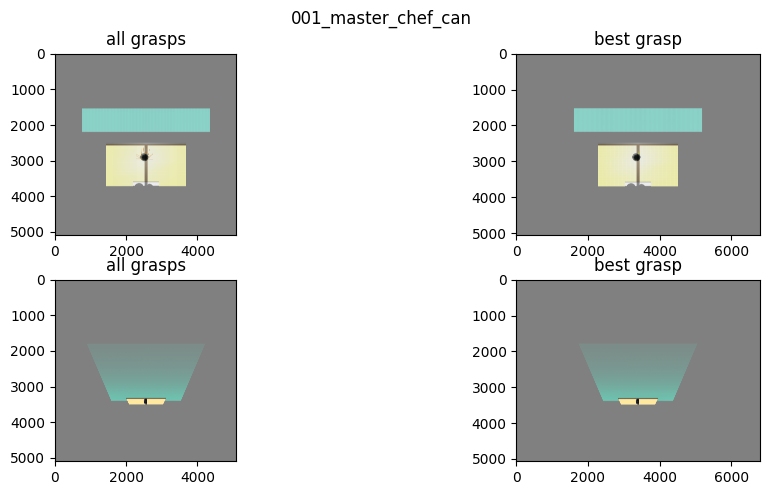

KeyboardInterrupt: 

In [7]:

for result_name in result_names:
    fig, axes = plt.subplots(2, len(result_paths), figsize=(10, 5))
    fig.suptitle(result_name)
    fig.tight_layout()

    for i, result_path in enumerate(result_paths):
        all_grasps = mpl.image.imread(result_path / result_name / "all_grasps.png")
        best_grasp = mpl.image.imread(result_path / result_name / "best_grasp.png")

        axes[i][0].imshow(all_grasps)
        axes[i][0].set_title("all grasps")

        axes[i][1].imshow(best_grasp)
        axes[i][1].set_title("best grasp")

    plt.show()
